<a href="https://colab.research.google.com/github/a-fokina/transcriptomics/blob/homework-2/HW2_Fokina_Anastasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Домашняя работа 2.ЕМ-алгоритм и подсчет числа прочтений.
###Задание 1
Сделайте NextFlow пайплайн, который будет подсчитывать принимать на вход аргументом список SRA-идентефикаторов эксперимента, а на выход давать подсчитанные экспрессии. Путь к индексу kallisto тоже будет подаваться на вход отдельно как аргумент.

Установим необходимые программы.

In [18]:
!wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
!tar -xvzf sratoolkit.3.0.0-ubuntu64.tar.gz

--2022-10-07 10:10:37--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.13, 2607:f220:41f:250::228, ...
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85777118 (82M) [application/x-gzip]
Saving to: ‘sratoolkit.3.0.0-ubuntu64.tar.gz.2’

sratoolkit.3.0.0-ub 100%[===================>]  81.80M   106MB/s    in 0.8s    

2022-10-07 10:10:38 (106 MB/s) - ‘sratoolkit.3.0.0-ubuntu64.tar.gz.2’ saved [85777118/85777118]

sratoolkit.3.0.0-ubuntu64/
sratoolkit.3.0.0-ubuntu64/bin/
sratoolkit.3.0.0-ubuntu64/bin/abi-dump
sratoolkit.3.0.0-ubuntu64/bin/abi-dump.3
sratoolkit.3.0.0-ubuntu64/bin/abi-load
sratoolkit.3.0.0-ubuntu64/bin/abi-load.3
sratoolkit.3.0.0-ubuntu64/bin/align-info
sratoolkit.3.0.0-ubuntu64/bin/align-info.3
sratoolkit.3.0.0-ubuntu64/bin/bam-load
srat

In [ ]:
!sratoolkit.3.0.0-ubuntu64/bin/vdb-config -i

2022-10-07T07:41:47 vdb-config.3.0.0 fatal: SIGNAL - Segmentation fault 


In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip

--2022-10-07 07:41:48--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  6.82MB/s    in 1.4s    

2022-10-07 07:41:50 (6.82 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introductio

In [ ]:
!chmod +x FastQC/fastqc

In [ ]:
!pip3 install multiqc
!multiqc qc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 25.0 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 237 kB 54.6 MB/s 
     |████████████████████████████████| 130 kB 61.8 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 86 kB 7.3 MB/s 
  Created wheel for spectra: filename=spectra-0.0.11-py3-none-any.whl size=17488 sha256=4976f2b869bb7281839582f8a7c45a7cb7bd14ca9a9fc01f8f5bf59b349775fb
  Stored in directory: /root/.cache/pip/wheels/e3/c8/a4/5a566fafff827fcb5741589e42002686bb29990fbc7b262b5e
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=f9f9f67c5a876867ac5023876b8e31399e1d88a1c2fa2f42c414ea9ecd41489b
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
  Created wheel for lzstring: filena

In [ ]:
!curl -fsSL https://get.nextflow.io | bash

CAPSULE: Downloading dependency org.multiverse:multiverse-core:jar:0.7.0
CAPSULE: Downloading dependency ch.qos.logback:logback-classic:jar:1.2.9
CAPSULE: Downloading dependency org.checkerframework:checker-compat-qual:jar:2.0.0
CAPSULE: Downloading dependency org.codehaus.mojo:animal-sniffer-annotations:jar:1.14
CAPSULE: Downloading dependency com.google.errorprone:error_prone_annotations:jar:2.1.3
CAPSULE: Downloading dependency org.codehaus.groovy:groovy-templates:jar:3.0.10
CAPSULE: Downloading dependency com.google.guava:guava:jar:24.1.1-jre
CAPSULE: Downloading dependency org.codehaus.jsr166-mirror:jsr166y:jar:1.7.0
CAPSULE: Downloading dependency io.nextflow:nf-commons:jar:22.04.5
CAPSULE: Downloading dependency org.slf4j:jcl-over-slf4j:jar:1.7.32
CAPSULE: Downloading dependency com.beust:jcommander:jar:1.35
CAPSULE: Downloading dependency org.slf4j:jul-to-slf4j:jar:1.7.32
CAPSULE: Downloading dependency com.google.j2objc:j2objc-annotations:jar:1.1
CAPSULE: Downloading dependenc

In [ ]:
!git clone https://github.com/pachterlab/kallisto.git
!apt-get install autoconf
!cd kallisto && mkdir build && cd build && cmake .. && make

Cloning into 'kallisto'...
remote: Enumerating objects: 4136, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 4136 (delta 79), reused 117 (delta 67), pack-reused 3986
Receiving objects: 100% (4136/4136), 4.24 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (2694/2694), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  automake autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 12 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk

Индексный файл создавался на основе транскриптома человека, скачанного с сайта NCBI https://www.ncbi.nlm.nih.gov/genome/guide/human/
RefSeq Transcripts

In [13]:
!./kallisto/build/src/kallisto index -i transcriptome.idx GRCh38_latest_rna.fna


[build] loading fasta file GRCh38_latest_rna.fna
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 4646 target sequences
[build] warning: replaced 2 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... tcmalloc: large alloc 1610612736 bytes == 0x564335136000 @  0x7f02cd830887 0x5642bf65982d 0x5642bf66140b 0x5642bf623f40 0x7f02cc6b0c87 0x5642bf62c10a
tcmalloc: large alloc 3221225472 bytes == 0x564395136000 @  0x7f02cd830887 0x5642bf65982d 0x5642bf66140b 0x5642bf623f40 0x7f02cc6b0c87 0x5642bf62c10a
done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 445077 contigs and contains 84760481 k-mers 



Пайплайн запускался на двух SRA из предыдущего дз - SRR6410611,
SRR6410612

Запустим скрипт hw2_pipeline.nf для анализа качества прочтений и подсчета экспрессии.

In [19]:
!./nextflow run hw2_pipeline.nf -with-report nextflow_report.html -with-dag flowchart.pdf --file sra.txt --work-dir /content/homework_2 --results_dir /content/homework_2 --i /content/transcriptome.idx

N E X T F L O W  ~  version 22.04.5
Launching `hw2_pipeline.nf` [soggy_bose] DSL2 - revision: 7cfd20cec8
List of files: [SRR6410612, SRR6410611]

  R E A D S  C O U N T  
SRA number         : [SRR6410612, SRR6410611]
Results location   : /content/homework_2
Index file         : /content/transcriptome.idx
[-        ] process > DownloadFastQ -
[-        ] process > QC            -

[-        ] process > DownloadFastQ -
[-        ] process > QC            -
[-        ] process > MultiQC       -
[-        ] process > Kallisto      -

executor >  local (2)
[7a/774805] process > DownloadFastQ (1) [  0%] 0 of 2
[-        ] process > QC                -
[-        ] process > MultiQC           -
[-        ] process > Kallisto          -

executor >  local (2)
[7a/774805] process > DownloadFastQ (1) [  0%] 0 of 2
[-        ] process > QC                -
[-        ] process > MultiQC           -
[-        ] process > Kallisto          -

executor >  local (3)
[7a/774805] process > DownloadFastQ 

Запустим скрипт hw2_pipeline_single.nf для анализа качества и подсчета экспрессии одноконцевых прочтений.

In [ ]:
!./nextflow run hw2_pipeline.nf -with-report nextflow_report.html -with-dag flowchart.pdf  --file sra.txt --infile /content/reads.fastq  --results_dir /content/homework_2 --i /content/transcriptome.idx --s 1 --l 100

/bin/bash: ./nextflow: No such file or directory


### Задание 2
Модифицируйте EM-алгоритм таким образом, чтобы он находил не два, а три кластера на наших данных.

In [ ]:
!gdown --id 17mf6RUEFOJ19t2zNuFlswSUs7MODwLlk #загружаем датасет

Визуализируем полученный датасет

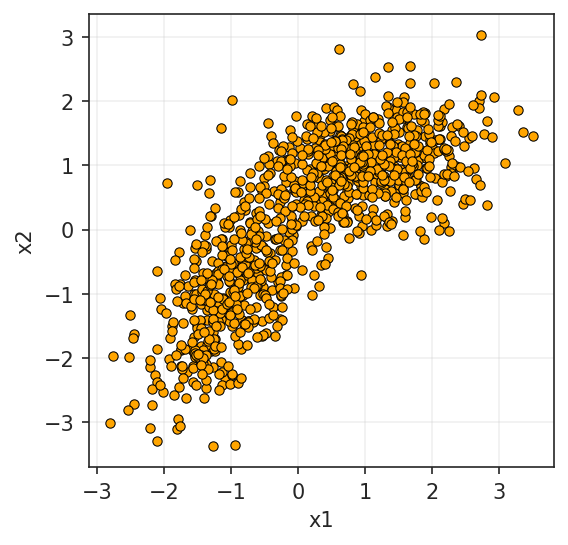

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("ticks")
df = pd.read_csv("EM_dataset.csv")
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=20, edgecolor="black", linewidth=0.5, ax=ax, color = "orange")
ax.grid(alpha=0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


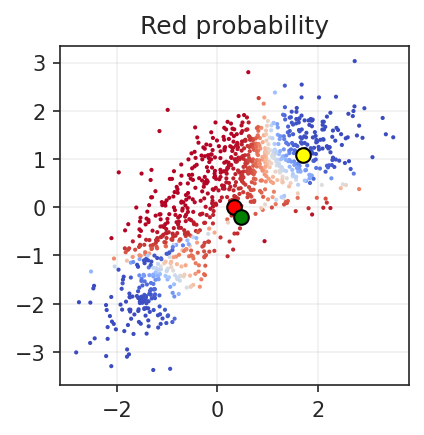

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


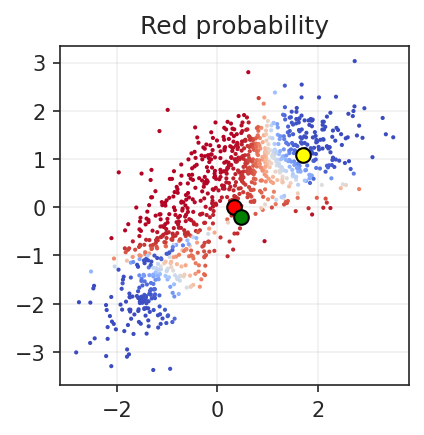

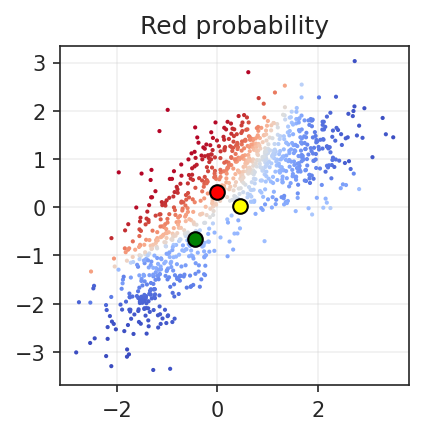

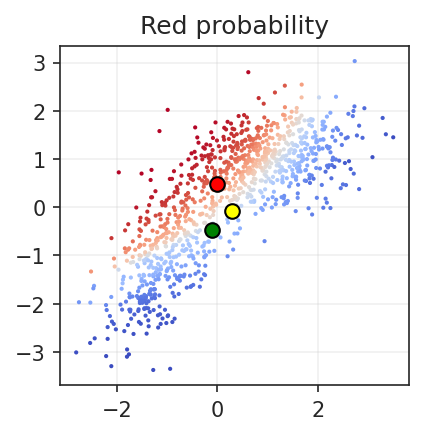

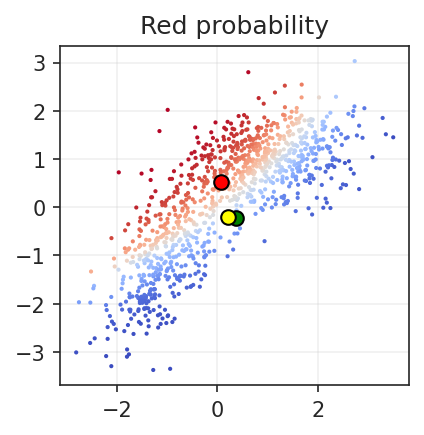

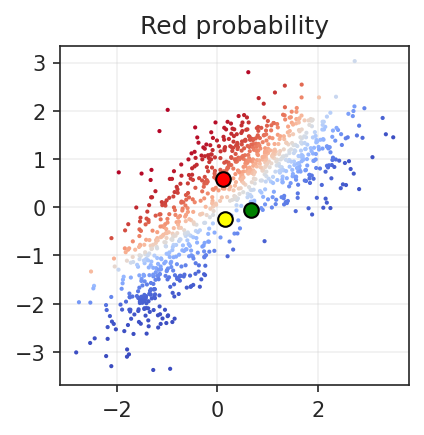

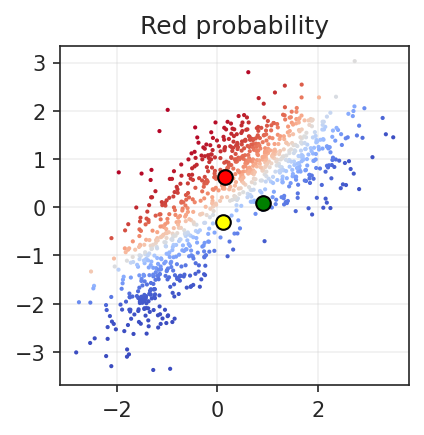

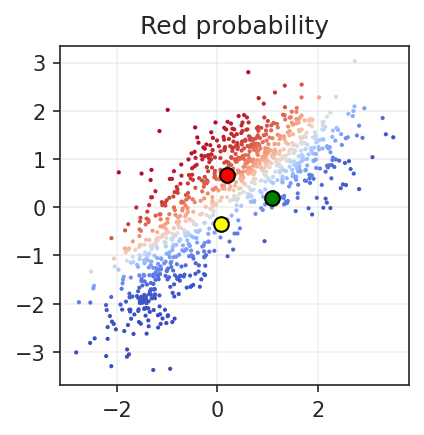

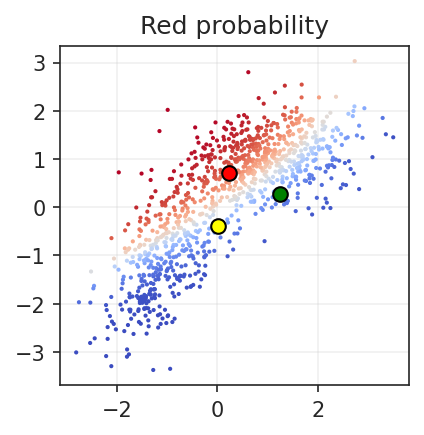

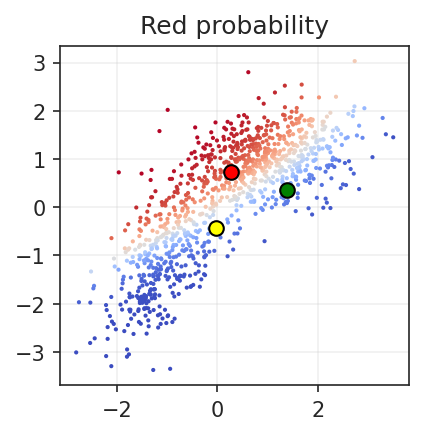

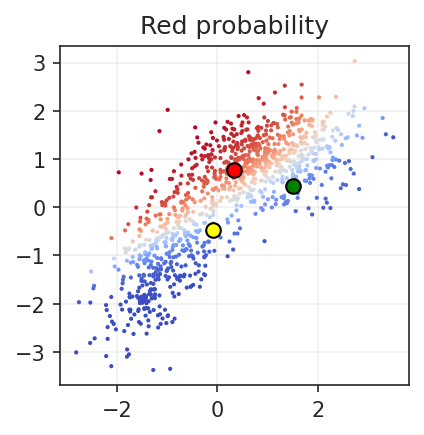

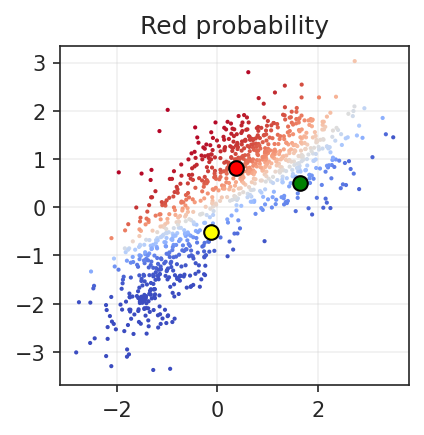

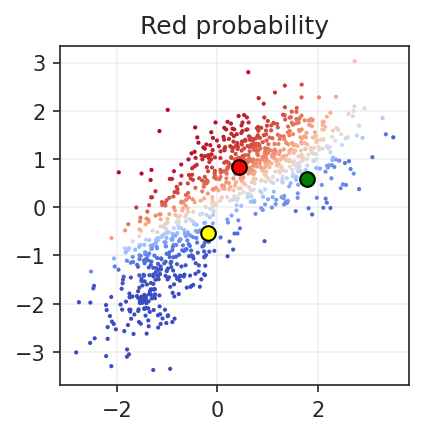

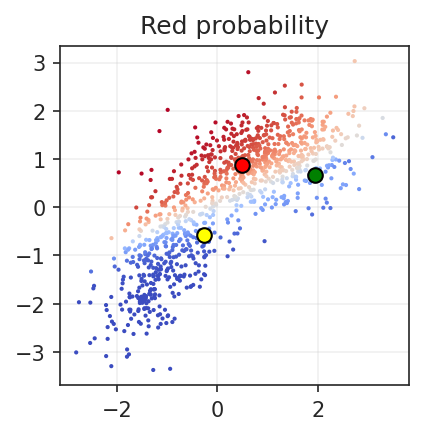

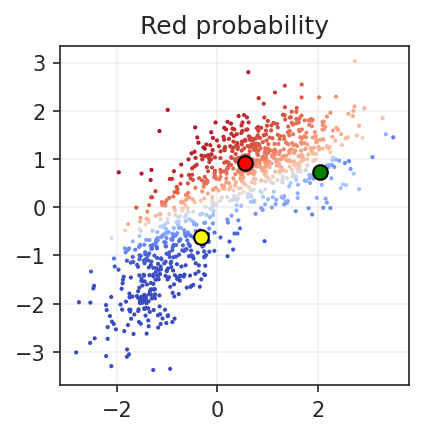

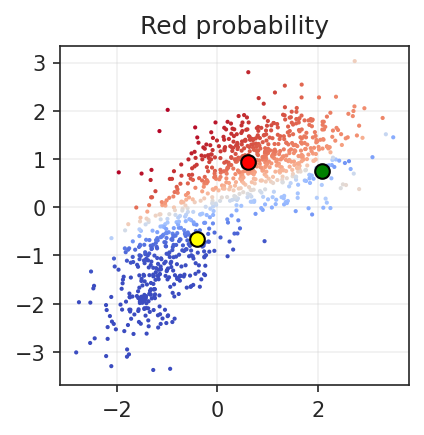

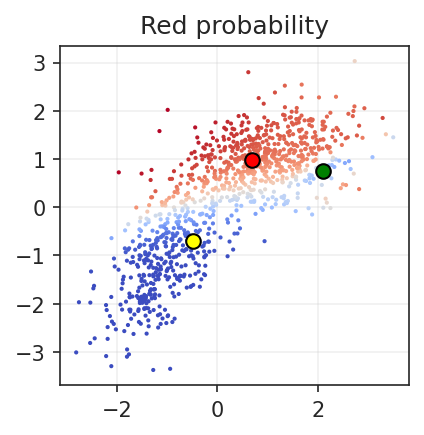

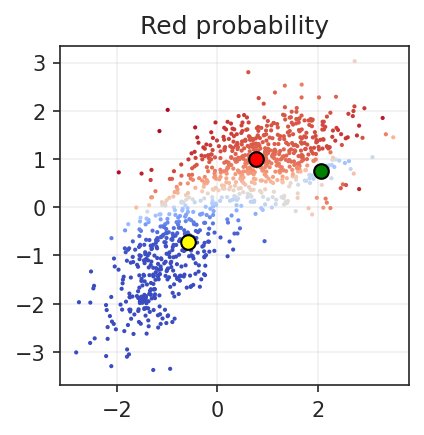

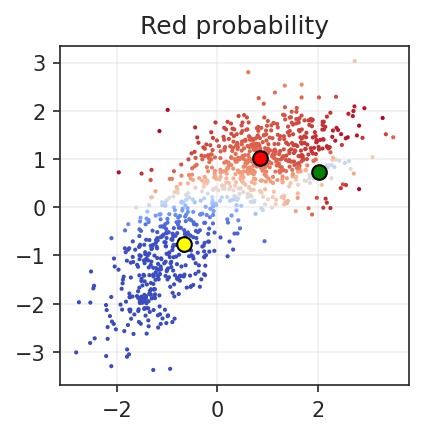

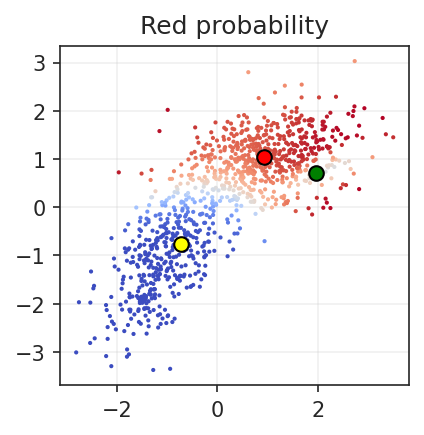

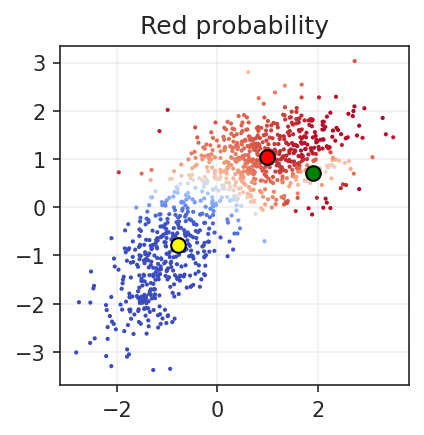

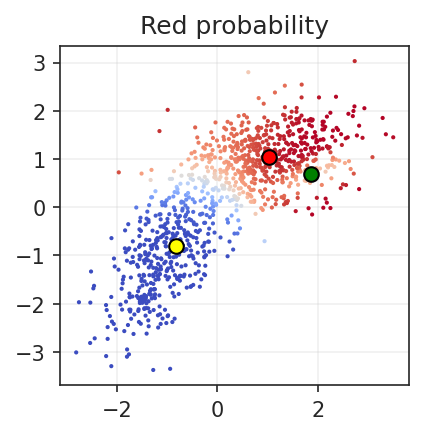

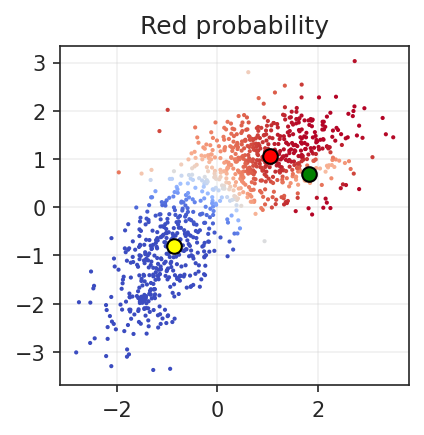

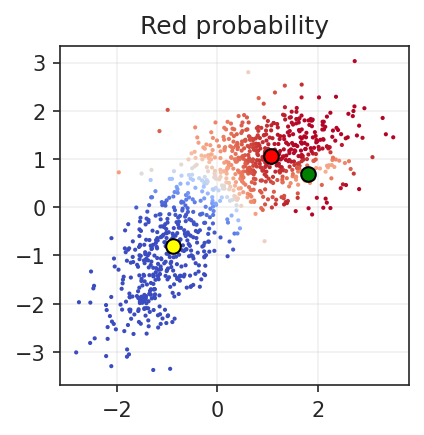

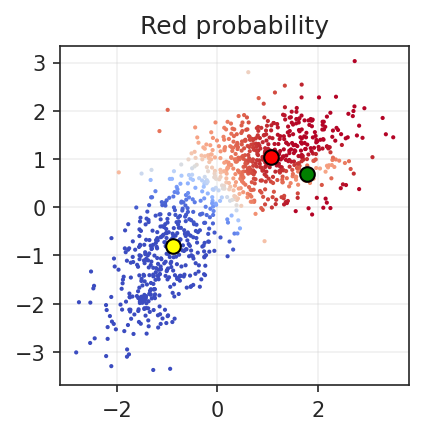

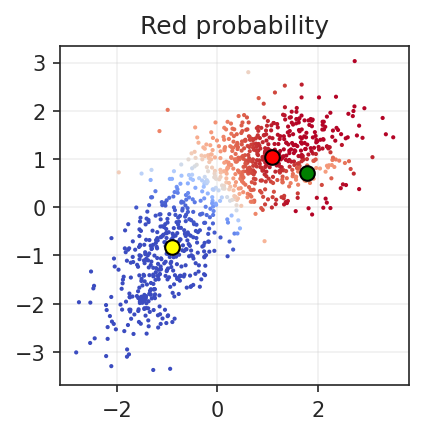

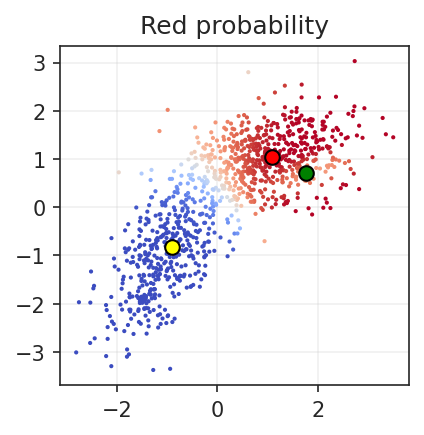

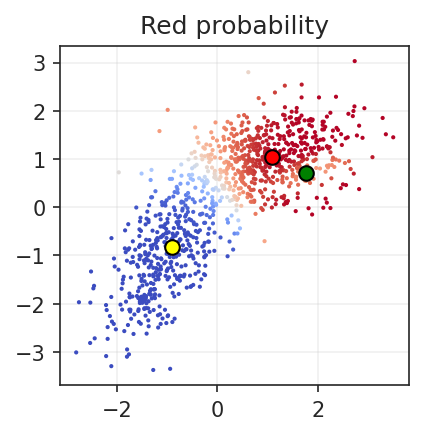

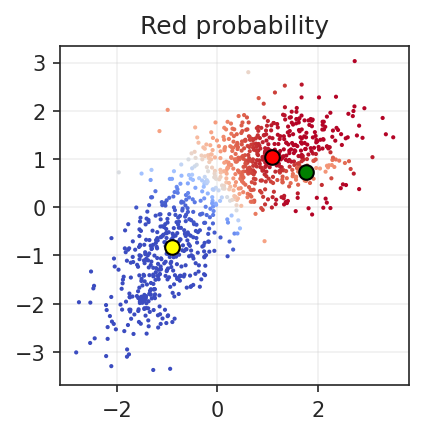

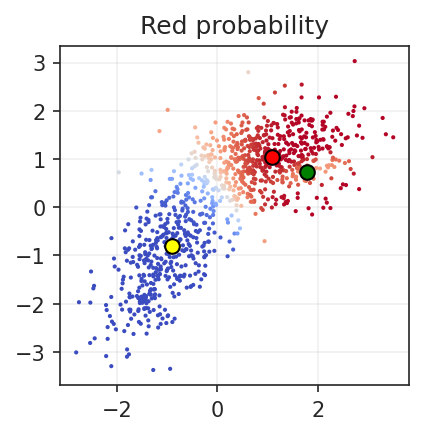

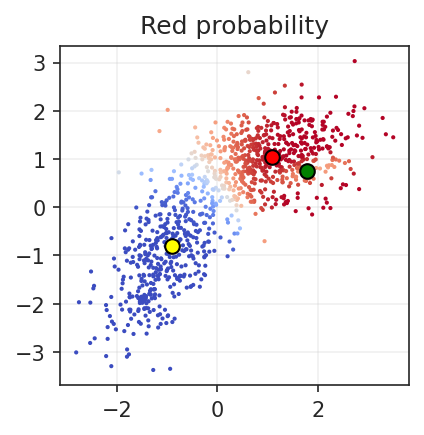

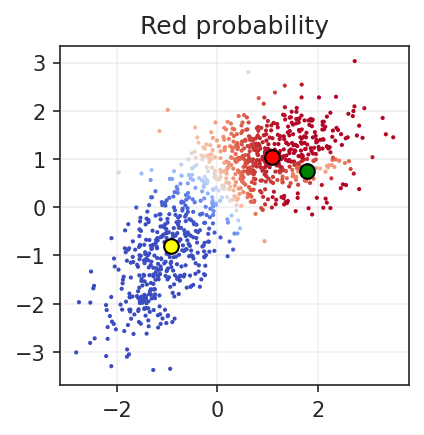

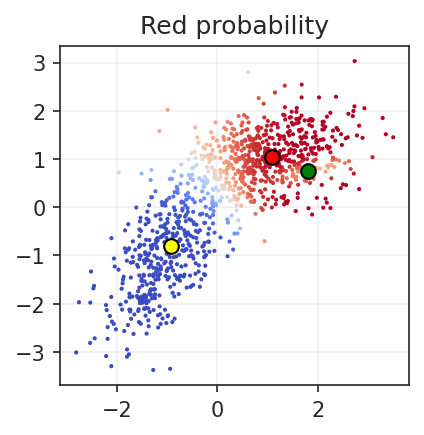

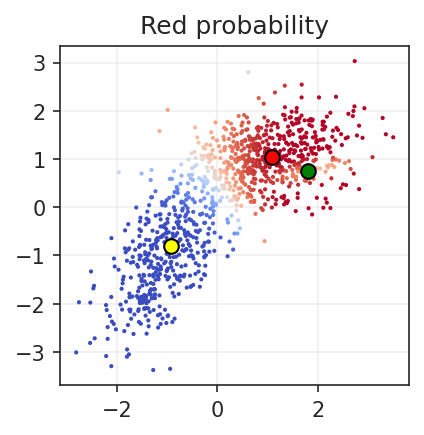

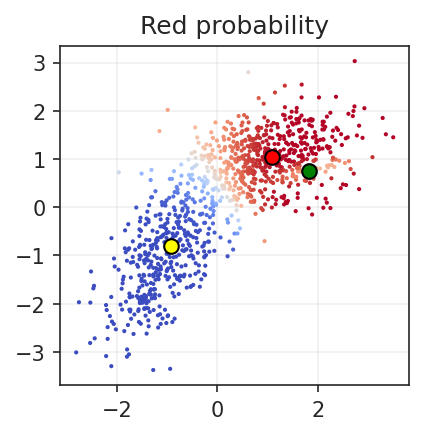

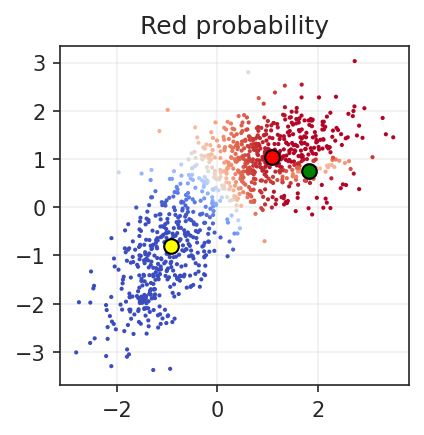

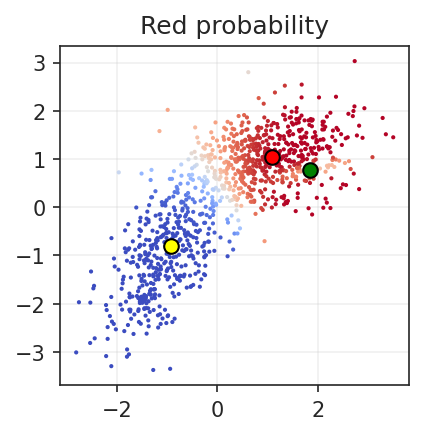

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


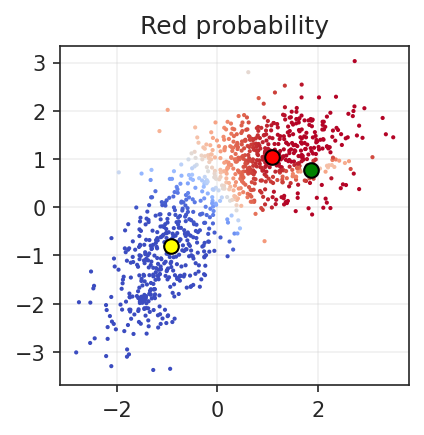

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


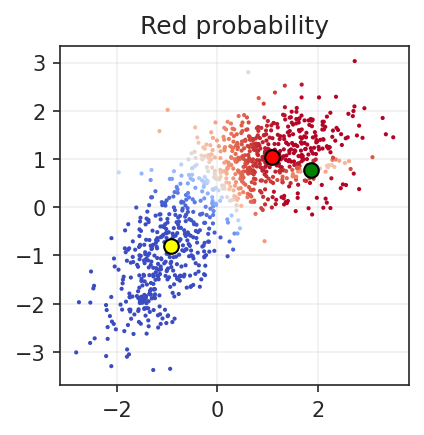

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


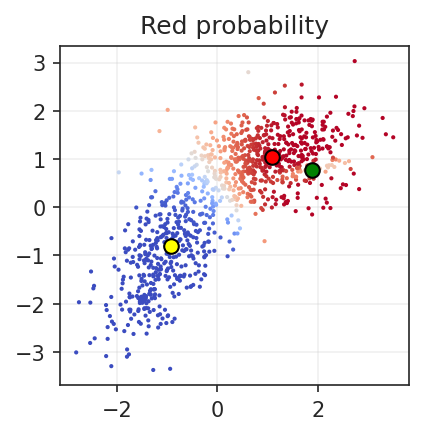

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


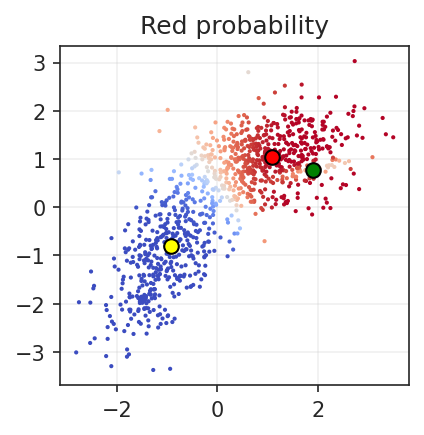

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


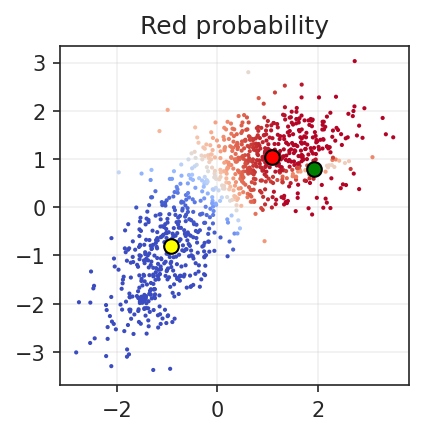

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


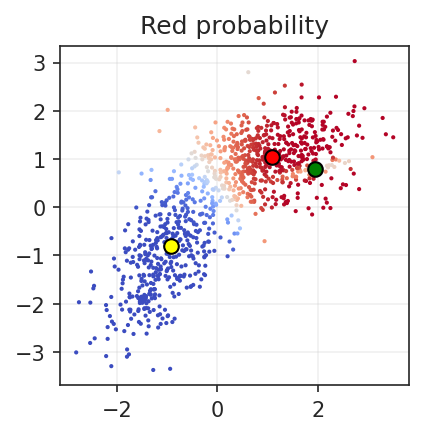

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


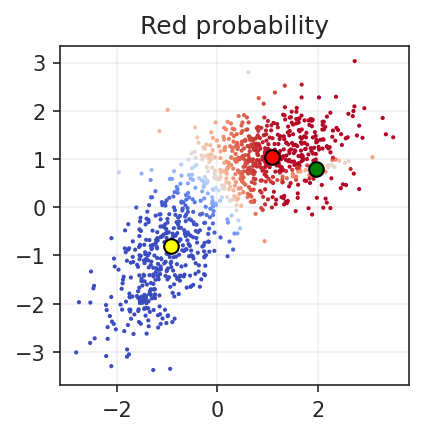

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


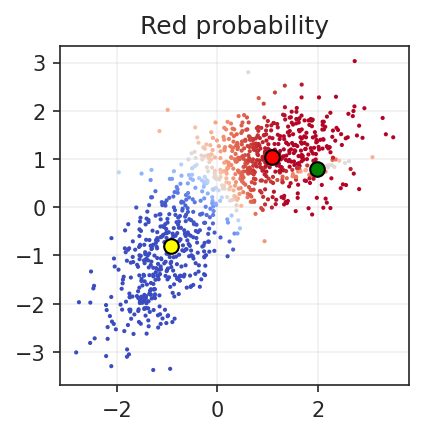

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


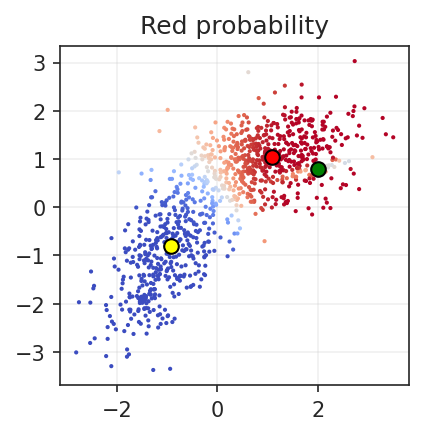

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


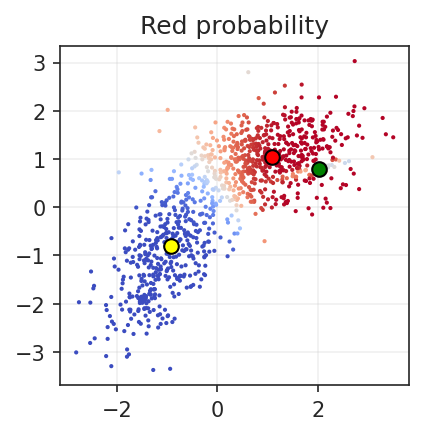

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


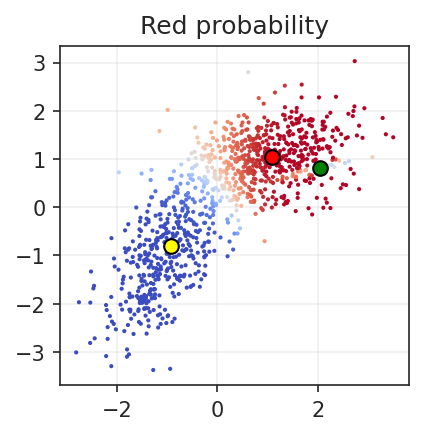

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


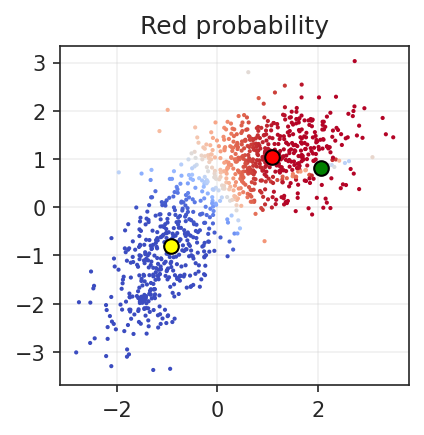

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


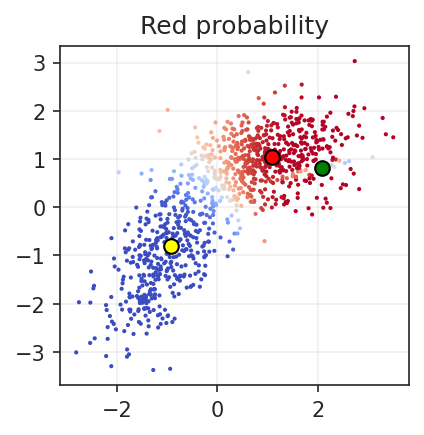

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


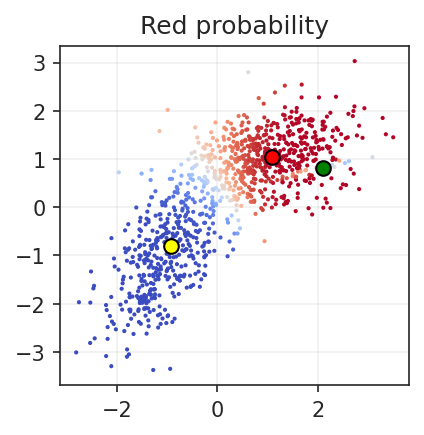

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


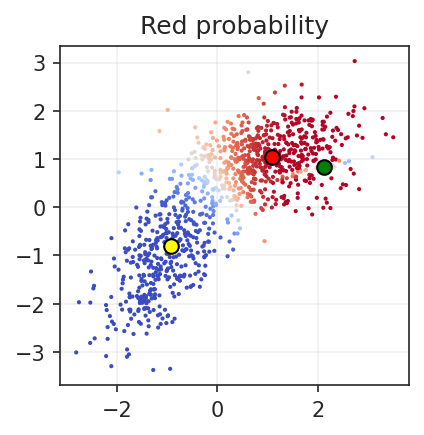

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


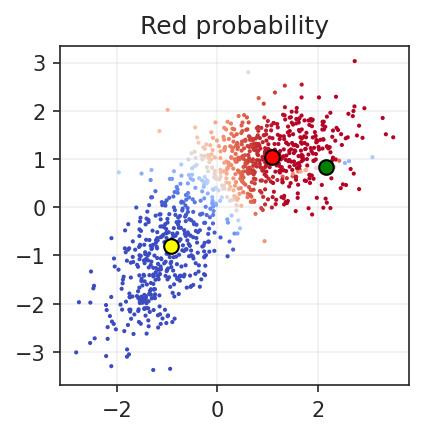

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


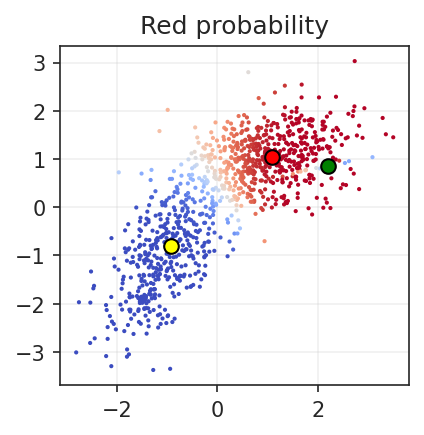

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


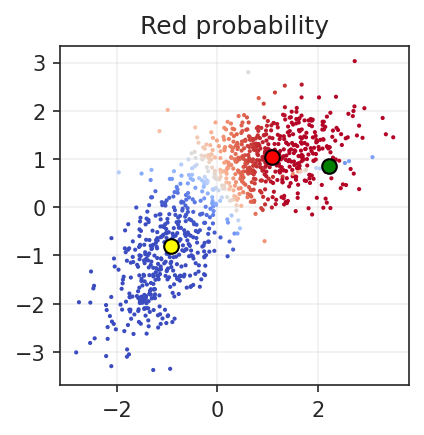

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


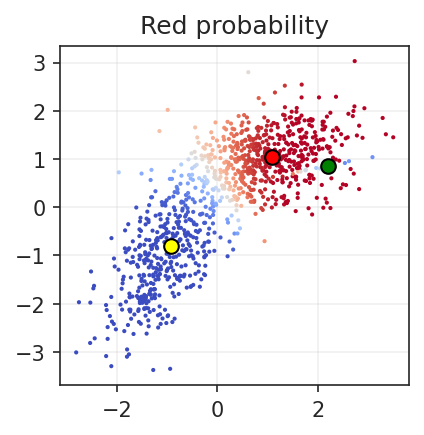

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


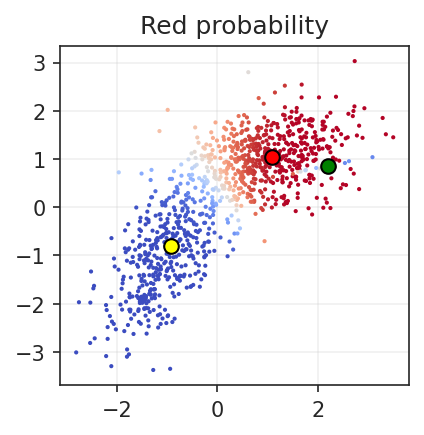

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


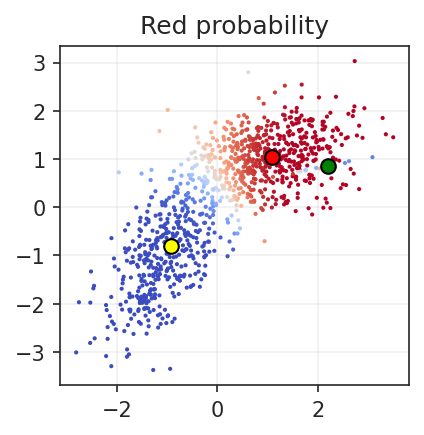

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


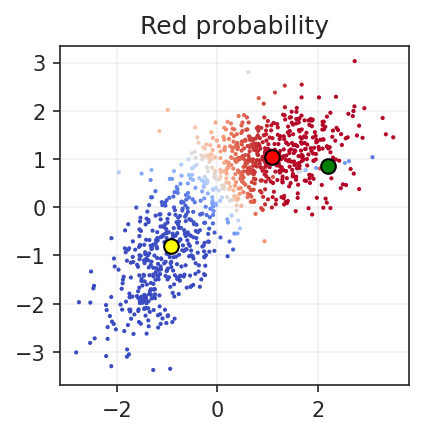

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


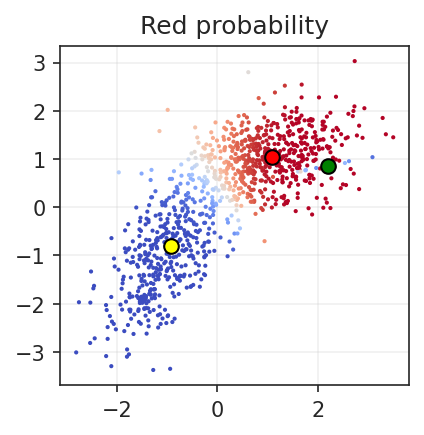

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


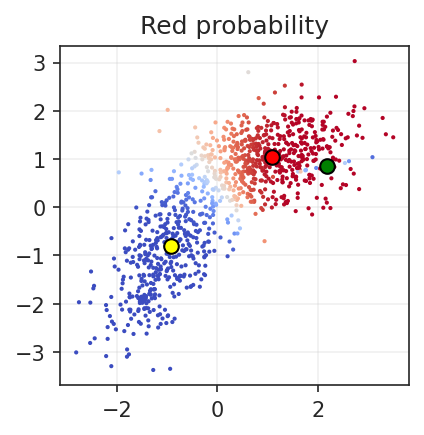

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


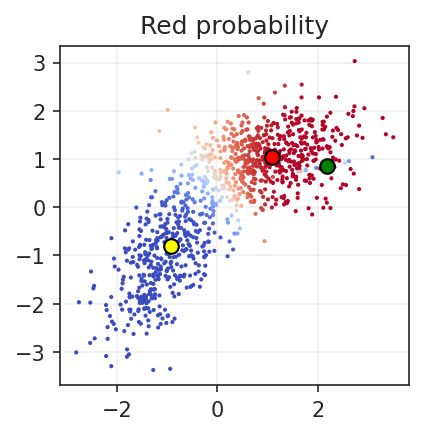

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


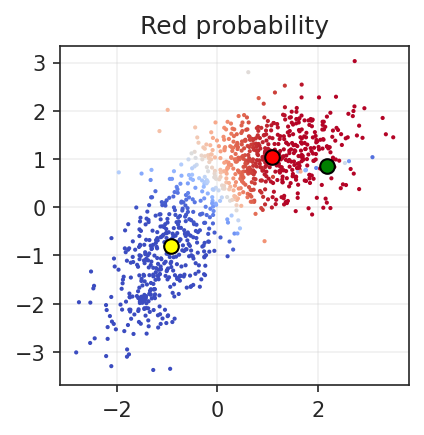

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


In [ ]:
import numpy as np

def get_random_psd(n=2):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())
#Получим изначальные параметры для дальнейшей оптимизации
params = {
    "phi1" : np.random.uniform(0, 0.33333),
    "phi2" : np.random.uniform(0, 0.33333),

    "mu1" : np.random.normal(0, 1, size=2),
    "mu2" : np.random.normal(0, 1, size=2),
    "mu3" : np.random.normal(0, 1, size=2),
    
    "sigma1": get_random_psd(),
    "sigma2" : get_random_psd(), 
    "sigma3" : get_random_psd() 
}

#На E-шаге мы будем для каждой точки считать постериорные log(Likelihood)'ы принадлежности каждой из точек к тому или иному кластеру.
import scipy.stats as stats
from scipy.special import logsumexp

X = df.values

def E_step(X, params, draw=False):
  LogProb = np.log([
      stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(X),
      stats.multivariate_normal(params["mu2"], params["sigma2"]).pdf(X),
      stats.multivariate_normal(params["mu3"], params["sigma3"]).pdf(X)
  ])

  logPrior = np.log([(1 - params["phi1"] - params["phi2"]), params["phi2"],params["phi1"]])
  logPosterior = logPrior + LogProb.T
  RealSoftMax = logsumexp(logPosterior, axis=1)
  probabilities = np.exp(logPosterior - np.array([RealSoftMax]).T)
  if draw:
    fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=probabilities[:, 0], linewidth=0, palette="coolwarm", ax=ax, s=4)
    ax.plot(params["mu1"][0], params["mu1"][1], marker="o", markersize=7, color="red", markeredgewidth=1, markeredgecolor="black")
    ax.plot(params["mu2"][0], params["mu2"][1], marker="o", markersize=7, color="green", markeredgewidth=1, markeredgecolor="black")
    ax.plot(params["mu3"][0], params["mu3"][1], marker="o", markersize=7, color="yellow", markeredgewidth=1, markeredgecolor="black")
    ax.set_title("Red probability")
    ax.grid(alpha=0.3)
    ax.legend().remove()
    plt.show()
  return RealSoftMax, probabilities
loglikelihood, probabilities = E_step(X, params, draw=True)
np.shape(probabilities)

#На М-шаге оптимизируем параметры в зависимости от того, как были определены принадлежности точек к кластерам на предыдущем шаге
def M_step(X, params, probabilities):
  prob_1 = probabilities[:, 0]
  prob_2 = probabilities[:, 1]
  prob_3 = probabilities[:, 2]

  # Вычисление новых значений
  phi1 = prob_1.sum() / len(X)
  phi2 = prob_2.sum() / len(X)

  mu1 = prob_1.dot(X) / np.sum(prob_1)
  mu2 = prob_2.dot(X) / np.sum(prob_2)
  mu3 = prob_3.dot(X) / np.sum(prob_3)

  sigma1 = (X - mu1).T.dot((X - mu1) * np.array([prob_1]).T) / np.sum(prob_1)
  sigma2 = (X - mu2).T.dot((X - mu2) * np.array([prob_2]).T) / np.sum(prob_2)
  sigma3 = (X - mu3).T.dot((X - mu3) * np.array([prob_3]).T) / np.sum(prob_3)
  
  return {
      "phi1" : phi1, "phi2" : phi2, 
      "mu1" : mu1, "mu2" : mu2, "mu3" : mu3,
      "sigma1": sigma1, "sigma2": sigma2, "sigma3": sigma3
  }
#Повторять оптимизацию, пока LogLikelihood не перестанет уменьшаться меньше, чем на 0.0001.
def run_EM(X, params, draw=False):
    import imageio
    avg_loglikelihoods = []

    while True:
        loglikelihood, probabilities = E_step(X, params, draw=draw)
        avg_loglikelihoods.append(np.mean(loglikelihood))
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.00001:
            break
        params = M_step(X, params, probabilities)
        
    loglikelihood, probabilities = E_step(X, params)
    forecasts = np.argmax(probabilities, axis=1)
    return forecasts, probabilities, avg_loglikelihoods
pred, prob, loglikelihoods = run_EM(X, params, draw=True)

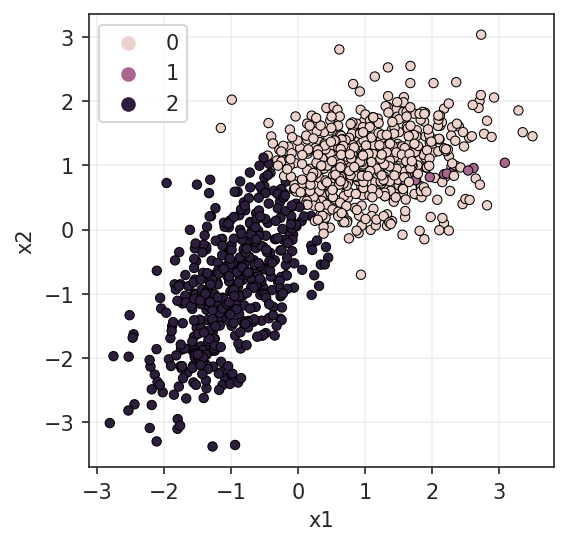

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=20, edgecolor="black", linewidth=0.5, ax=ax, hue=pred)
ax.grid(alpha=0.3)

Судя по тому, что результат разбиения на кластеры не воспроизводится, в моем коде есть некоторые ошибки, которые я не смогла найти. Кроме того, невоспроизводимость результата может быть объяснена тем, что данные разбиваются на два кластера, а однозначно разбить их на три алгоритм не может.

###Задание 3
Попробуйте сами написать алгоритм, который будет при помощи EM-алгоритма оценивать представленность экспрессию транскриптов (необязательно работать с графами или прочтениями, можете упростить ситуацию до модельной).